## 匯入需要的軟體和資料

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Downloads/E-commerce Customer Behavior.csv')

## 了解資料組成

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [3]:
df.shape

(350, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [6]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


## 資料清理

### 轉換資料類型

In [4]:
df['Discount Applied'] = df['Discount Applied'].map({True:'yes', False:'no'})

### 處理重複值

In [7]:
df.duplicated().sum()

np.int64(0)

沒有重複值

### 處理缺失值

In [8]:
df.isna().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [5]:
df = df.dropna()

缺失值筆數<1%，故刪除含缺失值的列

# EDA

## 單變數分析

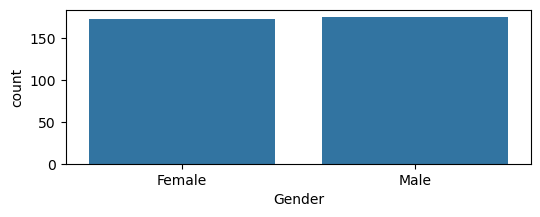

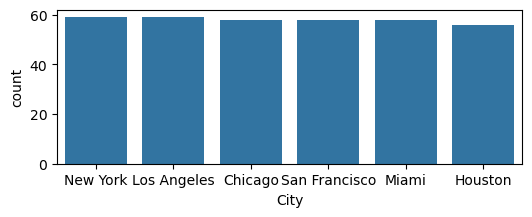

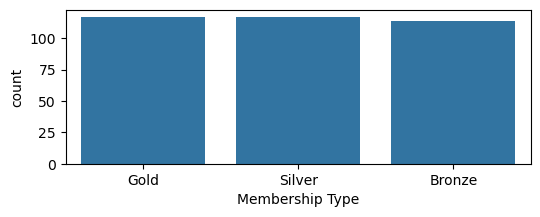

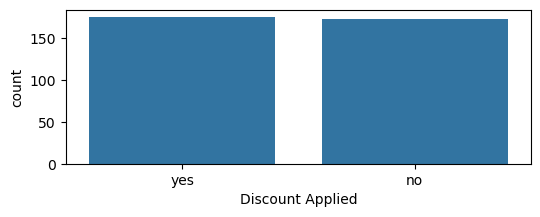

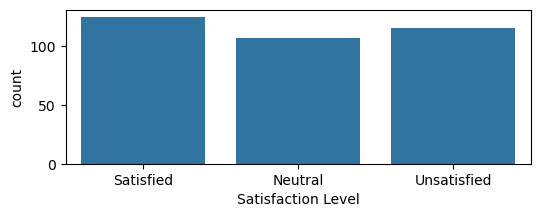

In [29]:
df_obj = df.select_dtypes(include='object')
for col in df_obj.columns:
    plt.figure(figsize=(6,2))
    sns.countplot(x=df_obj[col])

([<matplotlib.patches.Wedge at 0x15a8a7ab770>,
 [Text(0.4708714775903878, 0.9941227547902951, 'Satisfied'),
  Text(-1.0855091313663723, -0.1779604611148903, 'Unsatisfied'),
  Text(0.6254998189395193, -0.90484804056075, 'Neutral')],
 [Text(0.25683898777657516, 0.5422487753401609, '35.9%'),
  Text(-0.592095889836203, -0.09706934242630379, '33.3%'),
  Text(0.341181719421556, -0.49355347666949995, '30.7%')])

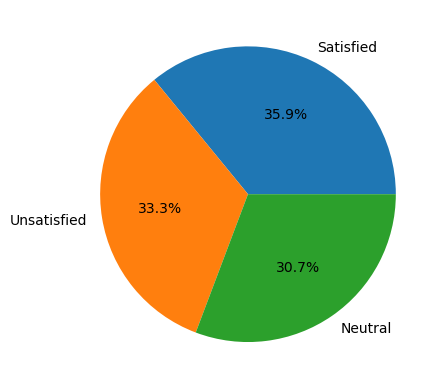

In [11]:
plt.pie(df['Satisfaction Level'].value_counts(), labels=df['Satisfaction Level'].value_counts().index,autopct='%1.1f%%')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total Spend'}>],
       [<Axes: title={'center': 'Items Purchased'}>,
        <Axes: title={'center': 'Average Rating'}>],
       [<Axes: title={'center': 'Days Since Last Purchase'}>, <Axes: >]],
      dtype=object)

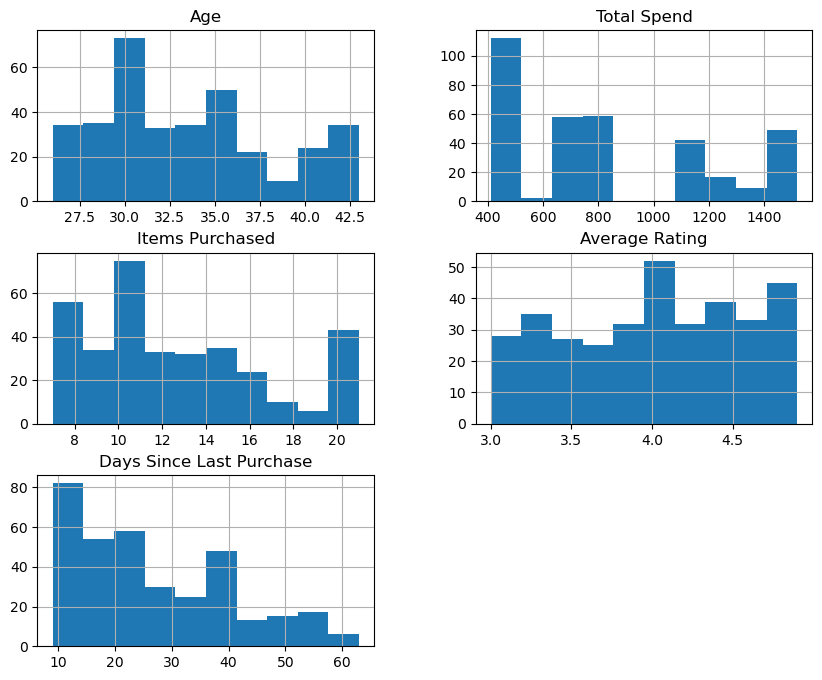

In [63]:
df_num.hist(figsize=(10, 8))

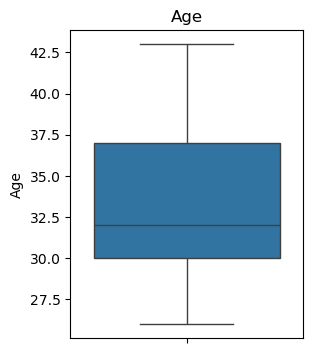

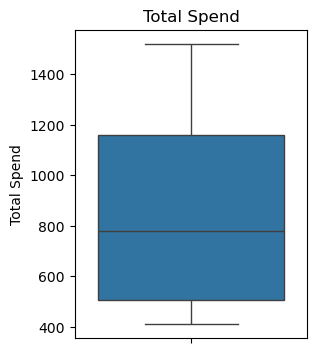

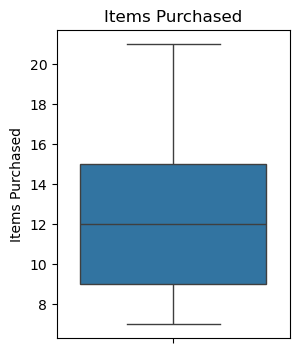

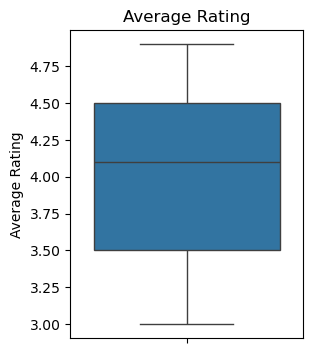

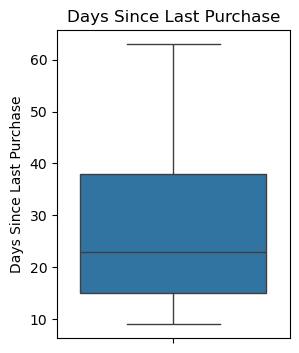

In [14]:
for col in df_num.columns:
    plt.figure(figsize=(3,4))
    plt.title(col)
    sns.boxplot(y=df_num[col])

從盒形圖確認數值型欄位沒有離群或異常值

## 雙變數分析 - 滿意度和其他變數

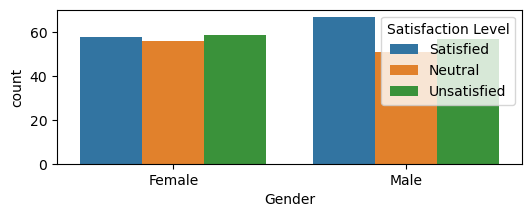

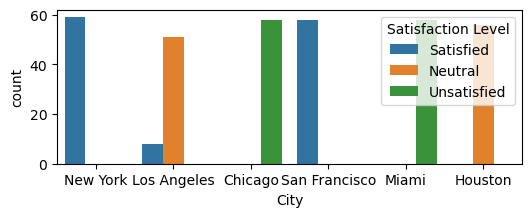

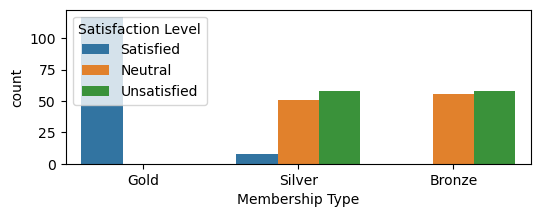

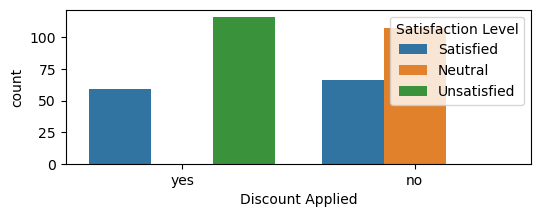

In [30]:
for col in df_obj.drop('Satisfaction Level', axis=1).columns:
    plt.figure(figsize=(6,2))
    sns.countplot(data=df_obj, x=df_obj[col], hue='Satisfaction Level')

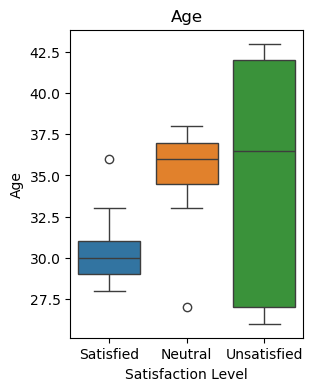

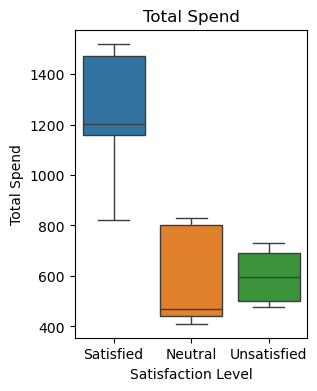

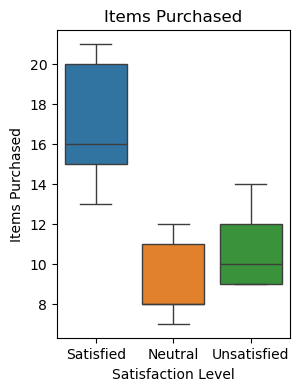

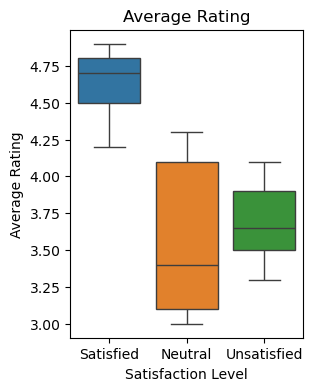

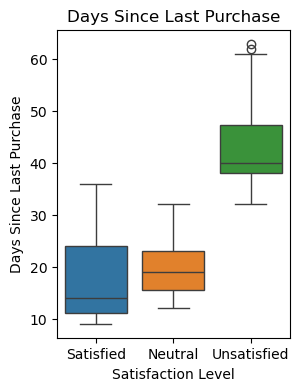

In [81]:
for col in df_num.columns:
    plt.figure(figsize=(3,4))
    plt.title(col)
    sns.boxplot(data=df, x='Satisfaction Level', y=df_num[col], hue='Satisfaction Level')

### 滿意度 vs. 性別

In [69]:
from scipy.stats import chi2_contingency

ct = pd.crosstab(df['Gender'], df['Satisfaction Level'])

chi2, p, dof, expected = chi2_contingency(ct)

print(f'卡方值: {chi2:.2f}')
print(f'p 值: {p:.4f}')

卡方值: 0.90
p 值: 0.6361


卡方檢定顯示性別和滿意度沒有顯著關係，但長條圖顯示男性滿意的比例較多，而女性的滿意和中性平均分布(因為女生標準比較高?)

### 滿意度 vs. 會員等級

In [72]:
ct = pd.crosstab(df['Membership Type'], df['Satisfaction Level'])

chi2, p, dof, expected = chi2_contingency(ct)

print(f'卡方值: {chi2:.2f}')
print(f'p 值: {p:.4f}')

卡方值: 315.80
p 值: 0.0000


會員等級會影響滿意度，等級越高滿意度越高

### 滿意度 vs. 折價券的使用

In [73]:
ct = pd.crosstab(df['Discount Applied'], df['Satisfaction Level'])

chi2, p, dof, expected = chi2_contingency(ct)

print(f'卡方值: {chi2:.2f}')
print(f'p 值: {p:.4f}')

卡方值: 223.39
p 值: 0.0000


折價券的使用與否會影響滿意度，所有不滿意的客戶都使用了折價券

### 滿意度 vs. 年紀

<Axes: xlabel='Satisfaction Level', ylabel='Age'>

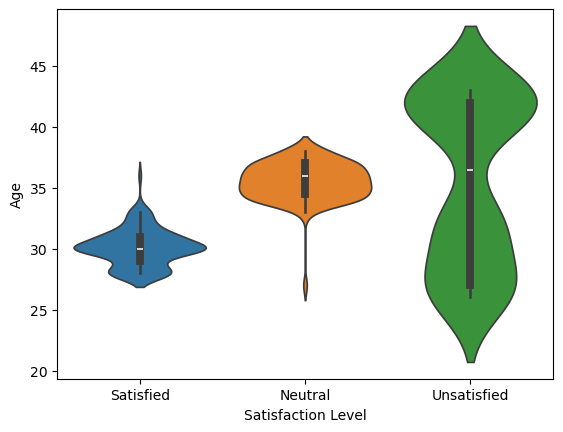

In [105]:
sns.violinplot(data=df, x='Satisfaction Level', y='Age', hue='Satisfaction Level')

In [20]:
from scipy.stats import f_oneway

scores_A = df[df['Satisfaction Level'] == 'Satisfied']['Age']
scores_B = df[df['Satisfaction Level'] == 'Neutral']['Age']
scores_C = df[df['Satisfaction Level'] == 'Unsatisfied']['Age']

f_stat, p_val = f_oneway(scores_A, scores_B, scores_C)

print(f'F 值: {f_stat:.2f}')
print(f'p 值: {p_val:.4f}')

F 值: 67.91
p 值: 0.0000


In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Satisfaction Level'], alpha=0.05)
print(tukey)


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
  Neutral   Satisfied  -5.4314    0.0 -6.7161 -4.1467   True
  Neutral Unsatisfied  -0.0686 0.9916 -1.3761  1.2388  False
Satisfied Unsatisfied   5.3628    0.0  4.1052  6.6203   True
------------------------------------------------------------


ANOVA檢定顯示年齡會影響滿意度，且不同滿意度之間的平均年齡有很大的差異  
進行事後分析發現滿意度為滿意的年齡和其他兩組之間有顯著差異，但中等評價和不滿意的顧客之間沒有顯著的年紀差異

## 雙變數分析 - 折價券和其他變數

使用折價券的人全部都不滿意他們的購買經驗，值得深入研究原因

In [23]:
from scipy.stats import ttest_ind
for col in df_num.columns:
    a1 = df[df['Discount Applied'] == 'yes'][col]
    a2 = df[df['Discount Applied'] == 'no'][col]
    t_stat, p = ttest_ind(a1, a2, equal_var=False)  # Welch’s t-test（推薦）
    print(col, f'p 值: {p:.4f}')

Age p 值: 0.2531
Total Spend p 值: 0.0017
Items Purchased p 值: 0.0224
Average Rating p 值: 0.1540
Days Since Last Purchase p 值: 0.0000


折價券的使用和總消費金額、購買商品數、距離上次購買的天數有關

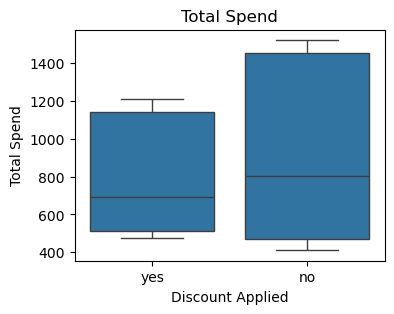

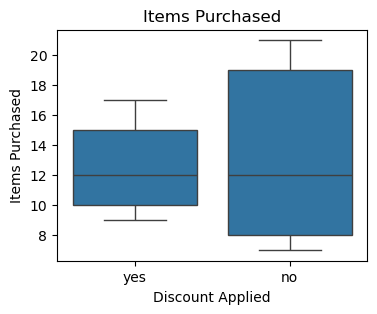

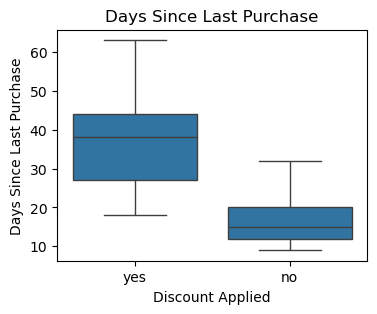

In [112]:
cols = ['Total Spend', 'Items Purchased', 'Days Since Last Purchase']
for col in cols:
    plt.figure(figsize=(4,3))
    plt.title(col)
    sns.boxplot(data=df, x='Discount Applied', y=col)

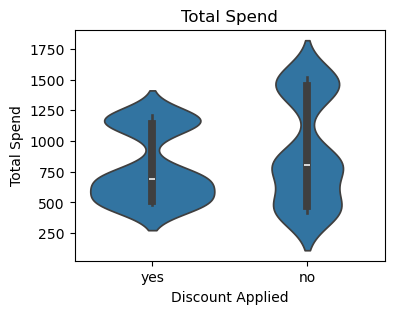

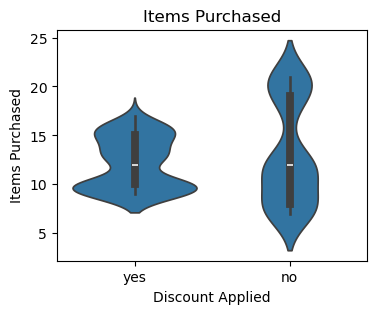

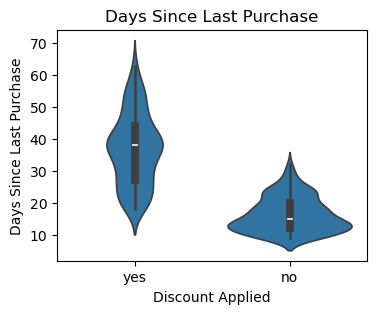

In [113]:
cols = ['Total Spend', 'Items Purchased', 'Days Since Last Purchase']
for col in cols:
    plt.figure(figsize=(4,3))
    plt.title(col)
    sns.violinplot(data=df, x='Discount Applied', y=col)

沒有使用折價券的客戶通常購買特別多或特別少的商品，因此有特別高或特別低的消費總額，這個族群多數在近20天有購買行為

## 雙變數分析 - 會員等級和年齡

<Axes: xlabel='Membership Type', ylabel='Age'>

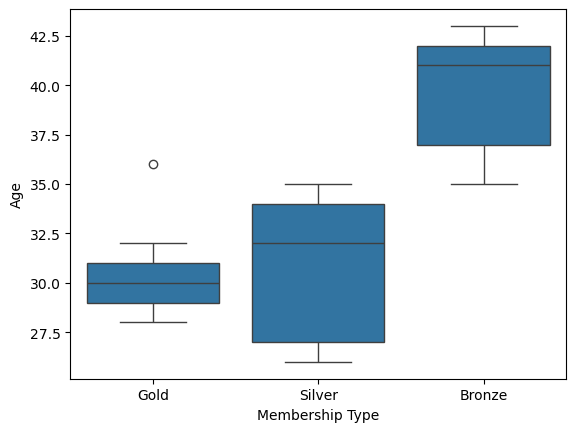

In [77]:
sns.boxplot(data=df, x='Membership Type', y='Age')

In [110]:
from scipy.stats import f_oneway

scores_A = df[df['Membership Type'] == 'Gold']['Age']
scores_B = df[df['Membership Type'] == 'Silver']['Age']
scores_C = df[df['Membership Type'] == 'Bronze']['Age']

f_stat, p_val = f_oneway(scores_A, scores_B, scores_C)

print(f'F 值: {f_stat:.2f}')
print(f'p 值: {p_val:.4f}')

F 值: 434.46
p 值: 0.0000


In [82]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['Age'], groups=df['Membership Type'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
Bronze   Gold  -9.4804   0.0 -10.2883 -8.6725   True
Bronze Silver   -7.848   0.0  -8.6559 -7.0401   True
  Gold Silver   1.6325   0.0   0.8298  2.4351   True
----------------------------------------------------


每個會員等級之間的年齡都有顯著差距，等級越高年紀越輕  

## 多變數分析

### 滿意度、年齡、會員等級

<Axes: xlabel='Membership Type', ylabel='Age'>

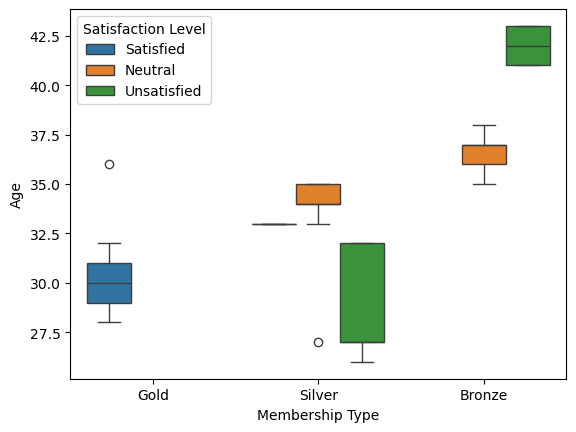

In [83]:
sns.boxplot(data=df, x='Membership Type', y='Age', hue='Satisfaction Level')

年紀越低通常會員等級越高，雖然銀等的平均年齡高於金等，但當中大部分的年輕人都不滿意

### 滿意度和購買行為

<Axes: >

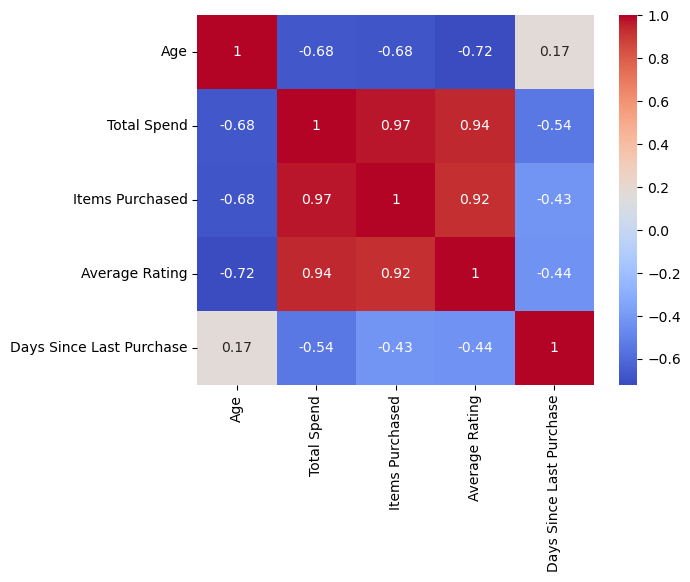

In [9]:
matrix = df_num.corr()
sns.heatmap(matrix, annot=True, cmap='coolwarm')

購買行為(總金額、購買商品數和商品平均評價)之間呈現正相關，即買的商品越多總消費金額越高、評分也越高

<Axes: xlabel='Total Spend', ylabel='Items Purchased'>

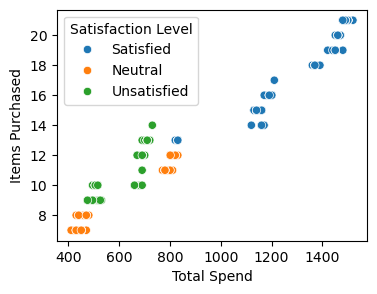

In [17]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Total Spend', y='Items Purchased', hue='Satisfaction Level')

<Axes: xlabel='Average Rating', ylabel='Items Purchased'>

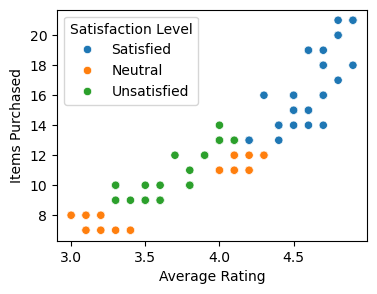

In [18]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Average Rating', y='Items Purchased', hue='Satisfaction Level')

<Axes: xlabel='Average Rating', ylabel='Total Spend'>

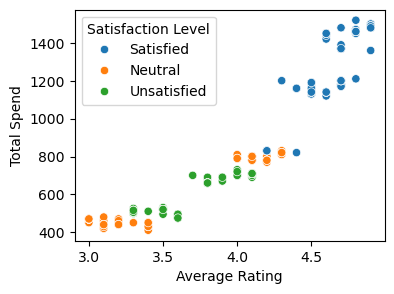

In [19]:
plt.figure(figsize=(4,3))
sns.scatterplot(data=df, x='Average Rating', y='Total Spend', hue='Satisfaction Level')

購買行為(總金額、購買的商品數量和平均商品評分)和滿意度呈現正相關，即滿意度越低購買金額越低

### 滿意度、城市、年齡

<Axes: xlabel='City', ylabel='Age'>

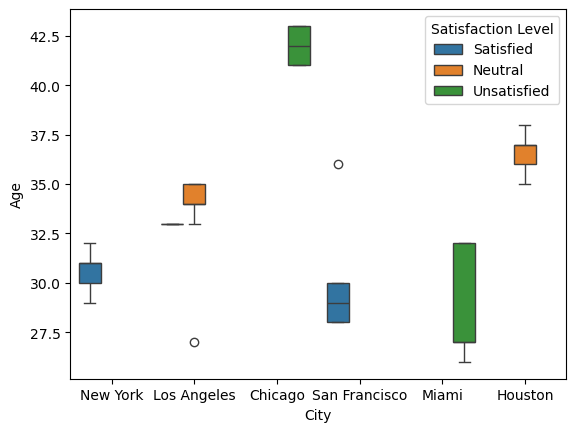

In [107]:
sns.boxplot(data=df, x='City', y='Age', hue='Satisfaction Level')

### 滿意度、城市、消費總額

<Axes: xlabel='City', ylabel='Total Spend'>

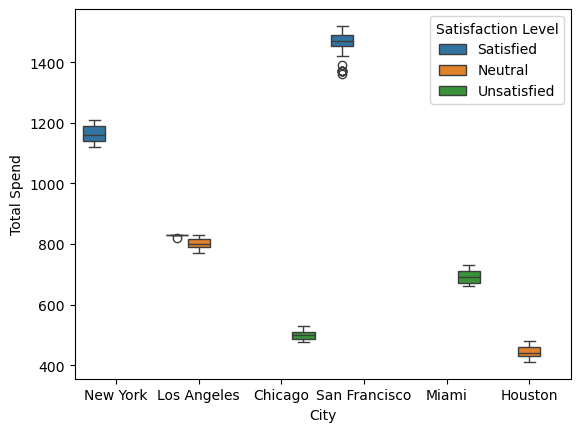

In [59]:
sns.boxplot(data=df, x='City', y='Total Spend', hue='Satisfaction Level')

各個城市的年齡和消費金額大致呈反比，只有邁阿密的客戶年紀較小且消費金額偏低